In [1]:
%matplotlib inline 
   
import ipywidgets as widgets    
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
from IPython.display import clear_output


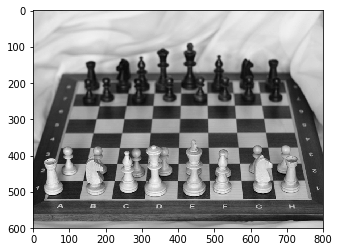

In [5]:
image = cv2.imread('chess.png') # Sudoku
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.imshow(gray, cmap = 'gray') # Source Image (RGB)
plt.show()

#Moravecc corner detection
# Harris
# Susan 

In [6]:
# img - Input image, it should be grayscale and float32 type.
# blockSize - It is the size of neighbourhood considered for corner detection
# ksize - Aperture parameter of Sobel derivative used.
# k - Harris detector free parameter in the equation.

blockSize:


A Jupyter Widget

kSize:


A Jupyter Widget

threshold:


A Jupyter Widget

epsilon:


A Jupyter Widget

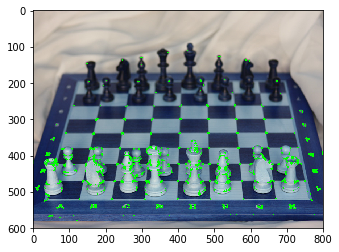

In [7]:
print('blockSize:')
wBlockSize = widgets.IntSlider(
    value=2,
    min=1,
    max=5,
    step=1,
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
)
display(wBlockSize)

print('kSize:')
wkSize = widgets.IntSlider(
    value=3,
    min=1,
    max=5,
    step=1,
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
)
display(wkSize)

print('threshold:')
wHarrisParameter = widgets.FloatSlider(
    value=0.04,
    min=0.04,
    max=0.06,
    step=0.01,
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
)
display(wHarrisParameter)

print('epsilon:')
wEpsilon = widgets.FloatSlider(
    value=0.01,
    min=0,
    max=0.02,
    step=0.0001,
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.3f',
)
display(wEpsilon)

harris = image.copy() 

def harrisParamsChanged(change):
    clear_output()

    print('blockSize:')
    display(wBlockSize)  
    print('kSize:')  
    display(wkSize)
    print('threshold:')  
    display(wHarrisParameter)
    print('epsilon:')  
    display(wEpsilon)

    blockSize = wBlockSize.value #2
    kSize = wkSize.value #3
    harrisParameter = wHarrisParameter.value #0.04
    eps = wEpsilon.value #0.001
    
    
    blockSize = 2
    kSize = 3
    harrisParameter = 0.04
    eps = 0.001
    
    image = cv2.imread('chess.png') # Sudoku
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    try:
        gray = np.float32(gray)
        dst = cv2.cornerHarris(gray, blockSize, kSize, harrisParameter) # (gray,2,3,0.04)
        #result is dilated for marking the corners, not important
        dst = cv2.dilate(dst,None)
        
        img = image.copy()
        img[dst>eps*dst.max()]=[0,255,0] #green
        plt.imshow(img)
        plt.show() 
        
    except:
        clear_output()
        print('Invalid parametres')
        print('blockSize:')
        display(wBlockSize)  
        print('kSize:')  
        display(wkSize)
        print('threshold:')
        display(wHarrisParameter)
        print('epsilon:')  
        display(wEpsilon)

wBlockSize.observe(harrisParamsChanged, names='value')
wkSize.observe(harrisParamsChanged, names='value')
wHarrisParameter.observe(harrisParamsChanged, names='value')
wEpsilon.observe(harrisParamsChanged, names='value')